### In this Notebook we performed Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("/Users/shrestaveeramaneni/Desktop/Work/Dec2_df.csv")

In [3]:
df.head()

,Unnamed: 0,primaryid,init_fda_dt,fda_dt,rept_cod,mfr_sndr,age,sex,e_sub,rept_dt,reporter_country,occr_country,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dechal,pt,outc_cod,dose_freq,dose_amt
0,0,104658923,20140922,20240709,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,1,PS,CIPROFLOXACIN,CIPROFLOXACIN,1,Oral,D,Respiratory acidosis,HO|OT,BID,500.0
1,1,104658923,20140922,20240709,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,1,PS,CIPROFLOXACIN,CIPROFLOXACIN,1,Oral,D,Cardiac failure congestive,HO|OT,BID,500.0
2,2,104658923,20140922,20240709,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,1,PS,CIPROFLOXACIN,CIPROFLOXACIN,1,Oral,D,Torsade de pointes,HO|OT,BID,500.0
3,3,104658923,20140922,20240709,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,1,PS,CIPROFLOXACIN,CIPROFLOXACIN,1,Oral,D,Electrocardiogram QT prolonged,HO|OT,BID,500.0
4,4,104658923,20140922,20240709,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,1,PS,CIPROFLOXACIN,CIPROFLOXACIN,1,Oral,D,Agitation,HO|OT,BID,500.0


In [4]:
df.drop(['Unnamed: 0', 'init_fda_dt', 'fda_dt', 'drug_seq', 'val_vbm'], axis = 1, inplace = True)

In [5]:
df.head()

,primaryid,rept_cod,mfr_sndr,age,sex,e_sub,rept_dt,reporter_country,occr_country,role_cod,drugname,prod_ai,route,dechal,pt,outc_cod,dose_freq,dose_amt
0,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,CIPROFLOXACIN,Oral,D,Respiratory acidosis,HO|OT,BID,500.0
1,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,CIPROFLOXACIN,Oral,D,Cardiac failure congestive,HO|OT,BID,500.0
2,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,CIPROFLOXACIN,Oral,D,Torsade de pointes,HO|OT,BID,500.0
3,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,CIPROFLOXACIN,Oral,D,Electrocardiogram QT prolonged,HO|OT,BID,500.0
4,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,CIPROFLOXACIN,Oral,D,Agitation,HO|OT,BID,500.0


In [6]:
df['outc_cod_split'] = df['outc_cod'].apply(lambda x: x.split('|'))

In [7]:
# Multilabel encoding of the target variable
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
outcome_encoded = pd.DataFrame(mlb.fit_transform(df['outc_cod_split']), columns=mlb.classes_)

df = pd.concat([df, outcome_encoded], axis=1)

In [8]:
df.head()

,primaryid,rept_cod,mfr_sndr,age,sex,e_sub,rept_dt,reporter_country,occr_country,role_cod,drugname,prod_ai,route,dechal,pt,outc_cod,dose_freq,dose_amt,outc_cod_split,CA,DE,DS,HO,LT,OT,RI
0,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,CIPROFLOXACIN,Oral,D,Respiratory acidosis,HO|OT,BID,500.0,"[HO, OT]",0,0,0,1,0,1,0
1,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,CIPROFLOXACIN,Oral,D,Cardiac failure congestive,HO|OT,BID,500.0,"[HO, OT]",0,0,0,1,0,1,0
2,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,CIPROFLOXACIN,Oral,D,Torsade de pointes,HO|OT,BID,500.0,"[HO, OT]",0,0,0,1,0,1,0
3,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,CIPROFLOXACIN,Oral,D,Electrocardiogram QT prolonged,HO|OT,BID,500.0,"[HO, OT]",0,0,0,1,0,1,0
4,104658923,EXP,AUROBINDO,31.0,F,Y,20240709,US,US,PS,CIPROFLOXACIN,CIPROFLOXACIN,Oral,D,Agitation,HO|OT,BID,500.0,"[HO, OT]",0,0,0,1,0,1,0


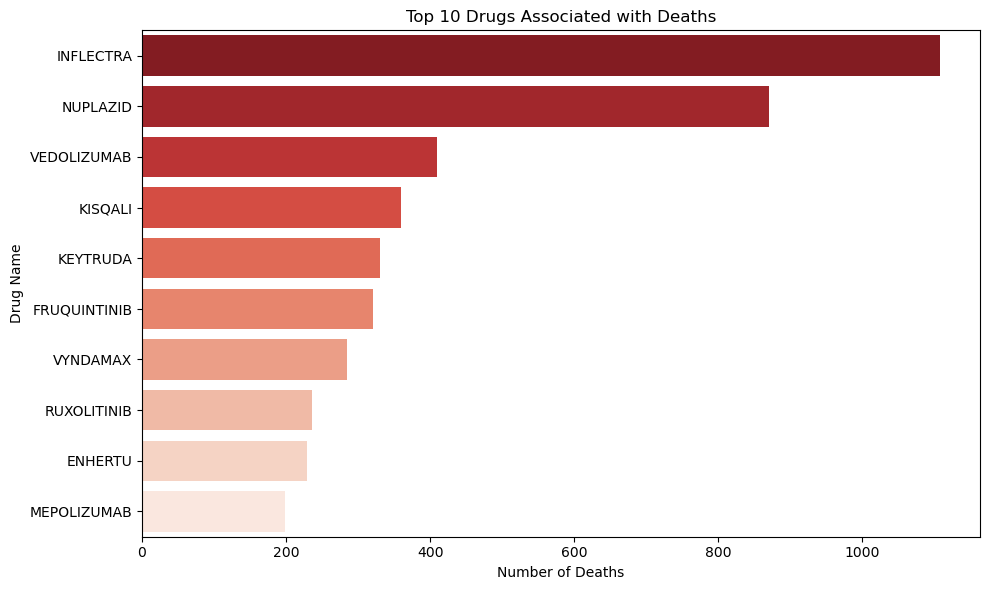

In [9]:

death_data = df[df['DE'] == 1]
death_by_drug = death_data.groupby('drugname').size().reset_index(name='death_count').sort_values(by='death_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=death_by_drug, y='drugname', x='death_count', palette='Reds_r')
plt.title('Top 10 Drugs Associated with Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Drug Name')
plt.tight_layout()
plt.show()


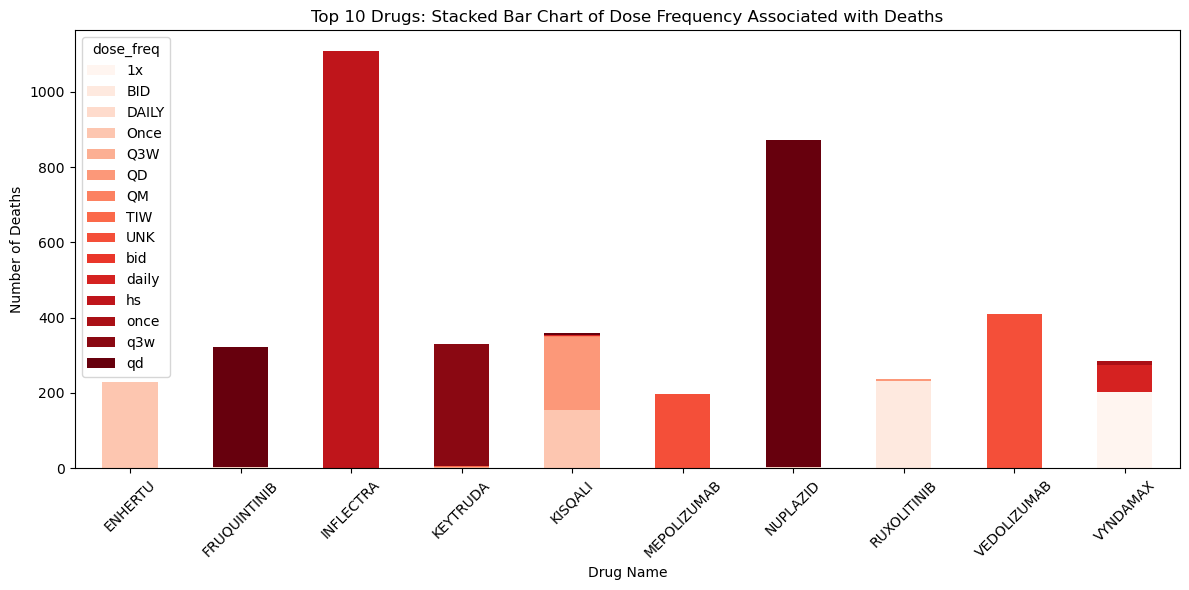

In [10]:

stacked_data = death_data.groupby(['drugname', 'dose_freq']).size().reset_index(name='death_count')

total_deaths = stacked_data.groupby('drugname')['death_count'].sum().reset_index(name='total_death_count')
top_10_drugs = total_deaths.nlargest(10, 'total_death_count')['drugname']

stacked_top10 = stacked_data[stacked_data['drugname'].isin(top_10_drugs)]

stacked_pivot = stacked_top10.pivot(index='drugname', columns='dose_freq', values='death_count').fillna(0)

stacked_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Reds')
plt.title('Top 10 Drugs: Stacked Bar Chart of Dose Frequency Associated with Deaths')
plt.ylabel('Number of Deaths')
plt.xlabel('Drug Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



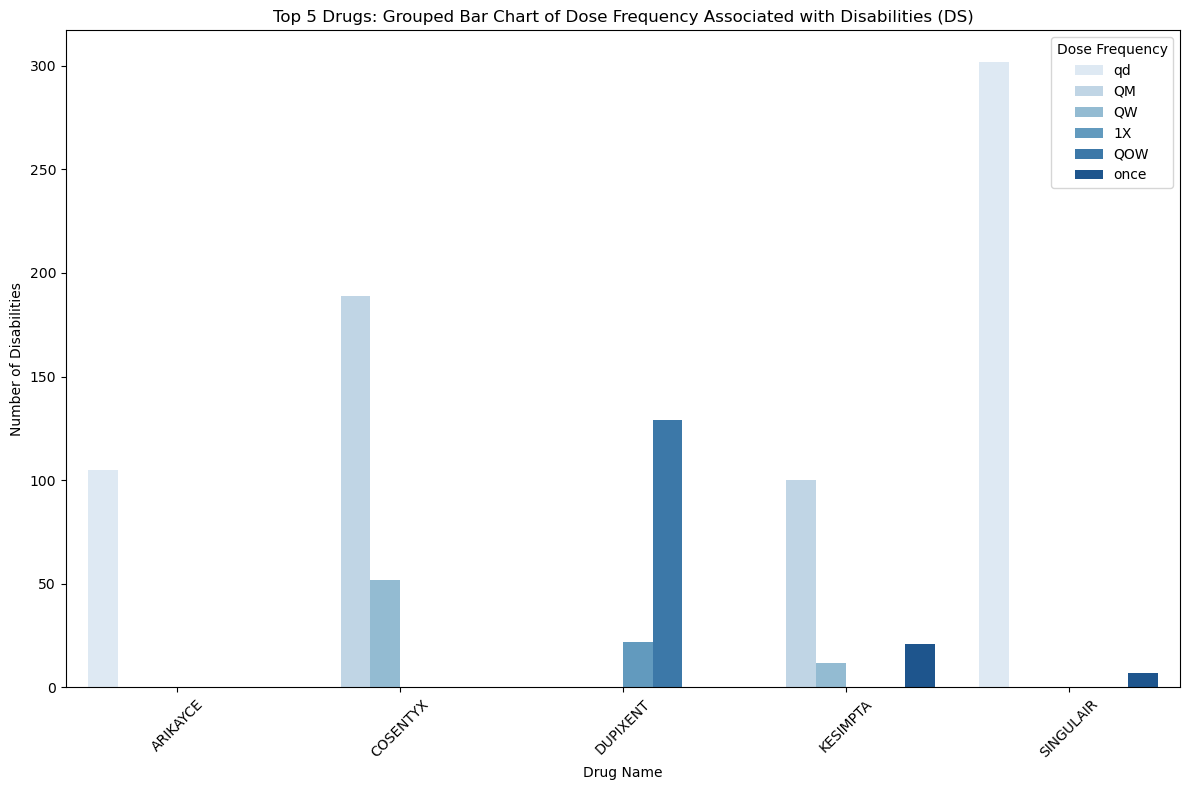

In [11]:

disability_data = df[df['DS'] == 1]

grouped_disability_data = disability_data.groupby(['drugname', 'dose_freq'])['DS'].sum().reset_index(name='disability_count')

total_disabilities = grouped_disability_data.groupby('drugname')['disability_count'].sum().reset_index(name='total_disability_count')

top_5_drugs = total_disabilities.nlargest(5, 'total_disability_count')['drugname']

grouped_top_5 = grouped_disability_data[grouped_disability_data['drugname'].isin(top_5_drugs)]


plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_top_5, x='drugname', y='disability_count', hue='dose_freq', palette='Blues')
plt.title('Top 5 Drugs: Grouped Bar Chart of Dose Frequency Associated with Disabilities (DS)')
plt.ylabel('Number of Disabilities')
plt.xlabel('Drug Name')
plt.xticks(rotation=45)
plt.legend(title='Dose Frequency')
plt.tight_layout()
plt.show()



### Above two plots show how drug frequencies affect the adverse effects

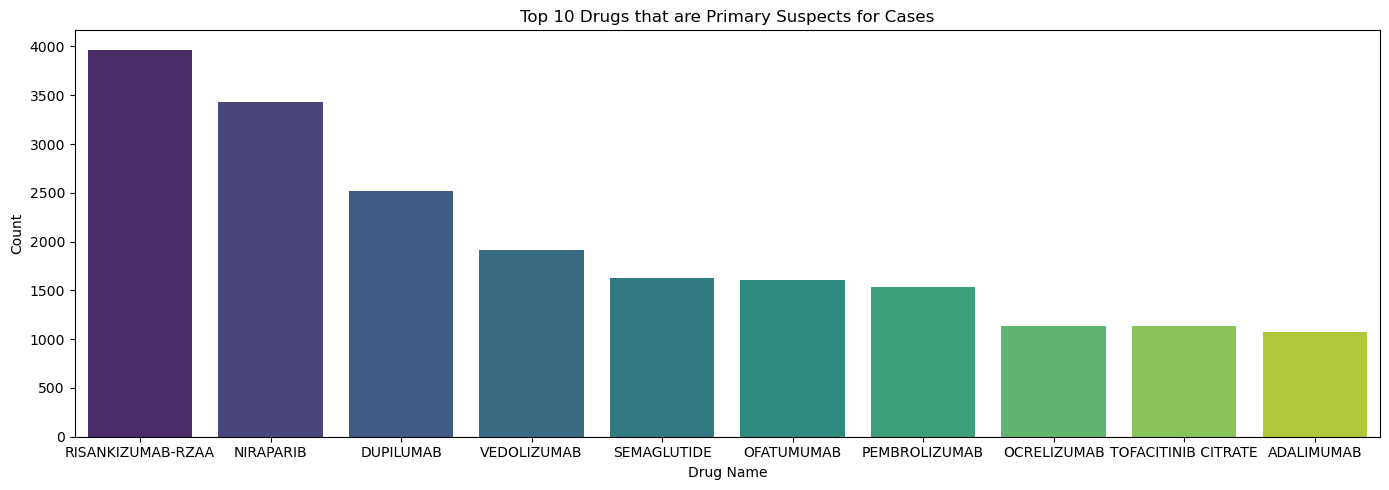

In [24]:
ps_df = df[df['role_cod'] == 'PS']

# Counting occurrences of each drug
drug_counts = ps_df['prod_ai'].value_counts().reset_index()
drug_counts.columns = ['prod_ai', 'count']

top_5_drugs = drug_counts.head(10)

plt.figure(figsize=(14, 5))
sns.barplot(x='prod_ai', y='count', data=top_5_drugs, palette='viridis')
plt.title("Top 10 Drugs that are Primary Suspects for Cases")
plt.ylabel("Count")
plt.xlabel("Drug Name")
plt.tight_layout()
plt.show()

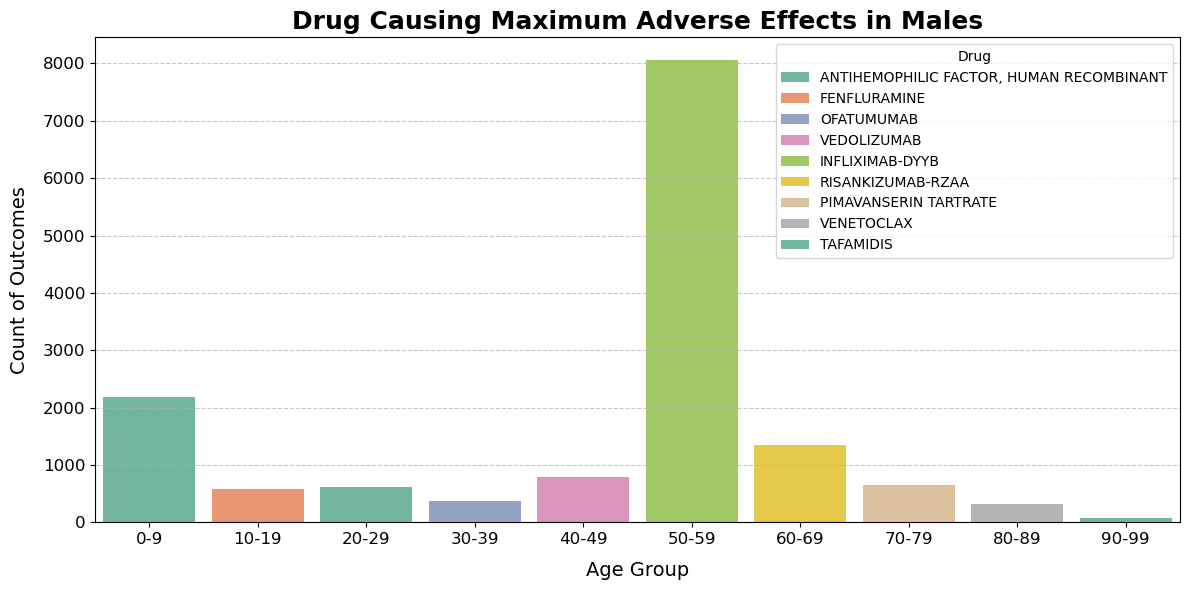

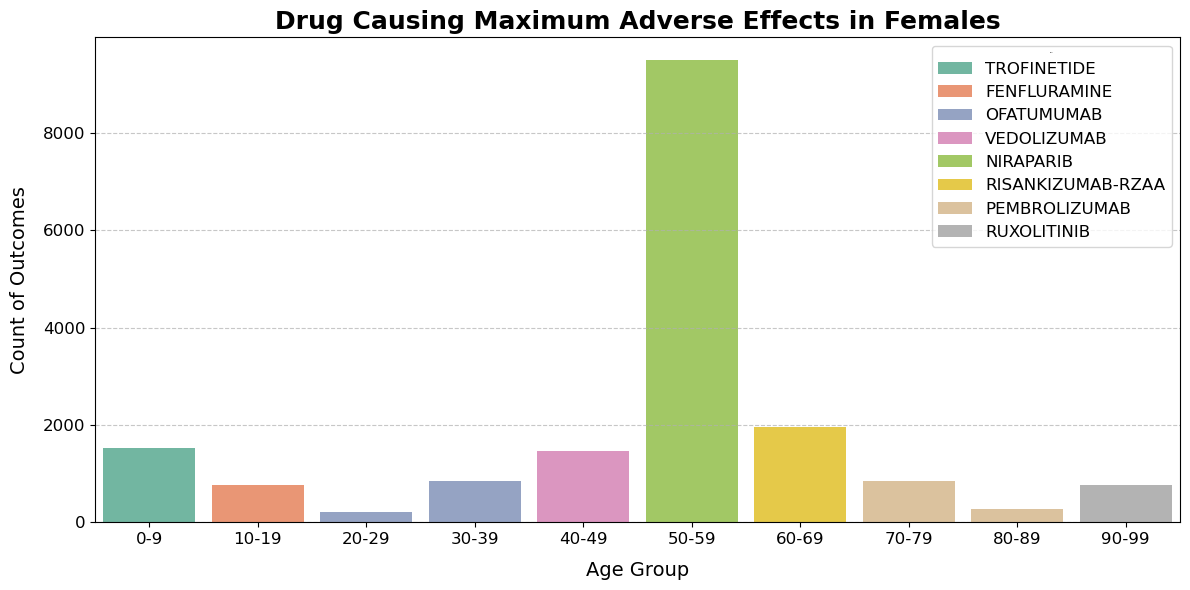

In [23]:
#Creating age groups in intervals of 10
df['age_group'] = pd.cut(df['age'], bins=range(0, 101, 10), right=False, labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99"])

# Counting occurrences of each drug in each age group and sex
age_drug_counts = df.groupby(['age_group', 'sex', 'prod_ai']).size().reset_index(name='count')

# Identifying the dominant drug in each age group and sex
dominant_drug = age_drug_counts.loc[age_drug_counts.groupby(['age_group', 'sex'])['count'].idxmax()]

# Separate DataFrames for males and females
dominant_drug_male = dominant_drug[dominant_drug['sex'] == 'M']
dominant_drug_female = dominant_drug[dominant_drug['sex'] == 'F']



plt.figure(figsize=(12, 6))
sns.barplot(
    x='age_group', y='count', hue='prod_ai', 
    data=dominant_drug_male, dodge=False, palette='Set2', width=0.85
)
plt.title("Drug Causing Maximum Adverse Effects in Males", fontsize=18, weight='bold')
plt.xlabel("Age Group", fontsize=14, labelpad=10)
plt.ylabel("Count of Outcomes", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Drug", fontsize= 10, title_fontsize= 10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Creating a plot for females
plt.figure(figsize=(12, 6))
sns.barplot(
    x='age_group', y='count', hue='prod_ai', 
    data=dominant_drug_female, dodge=False, palette='Set2', width=0.85
)
plt.title("Drug Causing Maximum Adverse Effects in Females", fontsize=18, weight='bold')
plt.xlabel("Age Group", fontsize=14, labelpad=10)
plt.ylabel("Count of Outcomes", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Drug", fontsize=12, title_fontsize=1, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Drug causing maximum cases in males is INFLIXIMAB-DYYB - which is used to treat Crohn's disease.

Drug causing maximum cases in females is NIRAPARIB - which is used to treat ovarian cancer